In [2]:
"""Errors."""

'Errors.'

# Ошибки в данных

In [3]:
import pandas as pd

## Подготовка данных

In [4]:
# создадим датафрейм из словаря
financials = pd.DataFrame(
    {
        "month": [
            "01/01/2019",
            "01/02/2019",
            "01/03/2019",
            "01/03/2019",
            "01/04/2019",
            "01/05/2019",
            "01/06/2019",
            "01/07/2019",
            "01/08/2019",
            "01/09/2019",
            "01/10/2019",
            "01/11/2019",
            "01/12/2019",
            "01/12/2019",
        ],
        "profit": [
            "1.20$",
            "1.30$",
            "1.25$",
            "1.25$",
            "1.27$",
            "1.13$",
            "1.23$",
            "1.20$",
            "1.31$",
            "1.24$",
            "1.18$",
            "1.17$",
            "1.23$",
            "1.23$",
        ],
        "MoM": [
            0.03,
            -0.02,
            0.01,
            0.02,
            -0.01,
            -0.015,
            0.017,
            0.035,
            0.02,
            0.01,
            0.00,
            -0.01,
            2.00,
            2.00,
        ],
        "high": [
            "Dubai",
            "Paris",
            "singapour",
            "singapour",
            "moscow",
            "Paris",
            "Madrid",
            "moscow",
            "london",
            "london",
            "Moscow",
            "Rome",
            "madrid",
            "madrid",
        ],
    }
)

financials

,month,profit,MoM,high
0,01/01/2019,1.20$,0.030,Dubai
1,01/02/2019,1.30$,-0.020,Paris
2,01/03/2019,1.25$,0.010,singapour
3,01/03/2019,1.25$,0.020,singapour
4,01/04/2019,1.27$,-0.010,moscow
5,01/05/2019,1.13$,-0.015,Paris
6,01/06/2019,1.23$,0.017,Madrid
7,01/07/2019,1.20$,0.035,moscow
8,01/08/2019,1.31$,0.020,london
9,01/09/2019,1.24$,0.010,london


In [5]:
# вначале получим общее представление о данных
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   14 non-null     object 
 1   profit  14 non-null     object 
 2   MoM     14 non-null     float64
 3   high    14 non-null     object 
dtypes: float64(1), object(3)
memory usage: 580.0+ bytes


## Дубликаты

### Поиск дубликатов

In [6]:
# keep = 'first' (параметр по умолчанию)
# помечает как дубликат (True) ВТОРОЕ повторяющееся значение
financials.duplicated(keep="first")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
dtype: bool

In [7]:
# keep = 'last' соответственно считает дубликатом ПЕРВОЕ повторяющееся значение
print(financials.duplicated(keep="last"))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
dtype: bool


In [8]:
# результат метода .duplicated() можно использовать как фильтр
print(financials[financials.duplicated(keep="last")])

         month profit  MoM    high
12  01/12/2019  1.23$  2.0  madrid


In [9]:
# если смотреть по месяцам, у нас два дубликата, а не один
# с помощью параметра subset мы ищем дубликаты по конкретным столбцам
financials.duplicated(subset=["month"])

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
dtype: bool

In [10]:
# и если смотреть по месяцм, дубликатов не один, а два
financials.duplicated(subset=["month"]).sum()

2

In [11]:
# создадим новый фильтр и выведем дубликаты по месяцам
print(financials[financials.duplicated(subset=["month"], keep="last")])

         month profit   MoM       high
2   01/03/2019  1.25$  0.01  singapour
12  01/12/2019  1.23$  2.00     madrid


In [12]:
# аналогично мы можем посмотреть на неповторяющиеся значения
(~financials.duplicated(subset=["month"])).sum()

12

In [13]:
# этот логический массив можно также использовать как фильтр
print(financials[~financials.duplicated(subset=["month"], keep="last")])

         month profit    MoM       high
0   01/01/2019  1.20$  0.030      Dubai
1   01/02/2019  1.30$ -0.020      Paris
3   01/03/2019  1.25$  0.020  singapour
4   01/04/2019  1.27$ -0.010     moscow
5   01/05/2019  1.13$ -0.015      Paris
6   01/06/2019  1.23$  0.017     Madrid
7   01/07/2019  1.20$  0.035     moscow
8   01/08/2019  1.31$  0.020     london
9   01/09/2019  1.24$  0.010     london
10  01/10/2019  1.18$  0.000     Moscow
11  01/11/2019  1.17$ -0.010       Rome
13  01/12/2019  1.23$  2.000     madrid


### Удаление дубликатов

In [14]:
# метод .drop_duplicates() удаляет дубликаты и
# по сути принимает те же параметры, что и .duplicated()
financials.drop_duplicates(
    keep="last", subset=["month"], ignore_index=True, inplace=True
)
financials

,month,profit,MoM,high
0,01/01/2019,1.20$,0.030,Dubai
1,01/02/2019,1.30$,-0.020,Paris
2,01/03/2019,1.25$,0.020,singapour
3,01/04/2019,1.27$,-0.010,moscow
4,01/05/2019,1.13$,-0.015,Paris
5,01/06/2019,1.23$,0.017,Madrid
6,01/07/2019,1.20$,0.035,moscow
7,01/08/2019,1.31$,0.020,london
8,01/09/2019,1.24$,0.010,london
9,01/10/2019,1.18$,0.000,Moscow


## Неверные значения

Доли процента и проценты

In [15]:
# рассчитаем среднемесячное изменение прибыли
financials.MoM.mean()

0.17308333333333334

In [16]:
# заменим 2% на 0.02
financials.iloc[11, 2] = 0.02

In [17]:
# вновь рассчитаем средний показатель
financials.MoM.mean()

0.008083333333333335

## Форматирование значений

Тип str вместо float

In [18]:
# попробуем сложить данные о прибыли
financials.profit.sum()

'1.20$1.30$1.25$1.27$1.13$1.23$1.20$1.31$1.24$1.18$1.17$1.23$'

In [19]:
# вначале удалим знак доллара с помощью метода .strip()
financials["profit"] = financials["profit"].str.strip("$")

# затем воспользуемся знакомым нам методом .astype()
financials["profit"] = financials["profit"].astype("float")

In [20]:
# отступление про ключевое слово assert
# напишем простейшую функцию деления одного числа на другое


def division(a_var: float, b_var: float) -> float:
    """Return division of 2 numbers."""
    # если делитель равен нулю, Питон выдаст ошибку (текст ошибки
    # указывать не обязательно)
    assert b_var != 0, "На ноль делить нельзя"
    return round(a_var / b_var, 2)

In [21]:
# попробуем разделить 5 на 0
# division(5, 0)

In [22]:
# проверим, получилось ли изменить тип данных
assert financials.profit.dtype == float

In [23]:
# теперь снова рассчитаем прибыль за год
financials.profit.sum()

14.709999999999999

Названия городов с заглавной буквы

In [24]:
# пусть названия всех городов начинаются с заглавной буквы
# для этого подойдет метод .title()
financials["high"] = financials["high"].str.title()
financials

,month,profit,MoM,high
0,01/01/2019,1.20,0.030,Dubai
1,01/02/2019,1.30,-0.020,Paris
2,01/03/2019,1.25,0.020,Singapour
3,01/04/2019,1.27,-0.010,Moscow
4,01/05/2019,1.13,-0.015,Paris
5,01/06/2019,1.23,0.017,Madrid
6,01/07/2019,1.20,0.035,Moscow
7,01/08/2019,1.31,0.020,London
8,01/09/2019,1.24,0.010,London
9,01/10/2019,1.18,0.000,Moscow


## Дата и время

In [25]:
# преобразуем столбец month в тип datetime, вручную указав
# исходный формат даты
financials["date1"] = pd.to_datetime(financials["month"], format="%d/%m/%Y")
financials

,month,profit,MoM,high,date1
0,01/01/2019,1.20,0.030,Dubai,2019-01-01
1,01/02/2019,1.30,-0.020,Paris,2019-02-01
2,01/03/2019,1.25,0.020,Singapour,2019-03-01
3,01/04/2019,1.27,-0.010,Moscow,2019-04-01
4,01/05/2019,1.13,-0.015,Paris,2019-05-01
5,01/06/2019,1.23,0.017,Madrid,2019-06-01
6,01/07/2019,1.20,0.035,Moscow,2019-07-01
7,01/08/2019,1.31,0.020,London,2019-08-01
8,01/09/2019,1.24,0.010,London,2019-09-01
9,01/10/2019,1.18,0.000,Moscow,2019-10-01


In [26]:
# теперь давайте попросим Питон самостоятельно определить формат даты
# для этого используем pd.to_datetime() без дополнительных параметров
financials["date2"] = pd.to_datetime(financials["month"])
financials

,month,profit,MoM,high,date1,date2
0,01/01/2019,1.20,0.030,Dubai,2019-01-01,2019-01-01
1,01/02/2019,1.30,-0.020,Paris,2019-02-01,2019-01-02
2,01/03/2019,1.25,0.020,Singapour,2019-03-01,2019-01-03
3,01/04/2019,1.27,-0.010,Moscow,2019-04-01,2019-01-04
4,01/05/2019,1.13,-0.015,Paris,2019-05-01,2019-01-05
5,01/06/2019,1.23,0.017,Madrid,2019-06-01,2019-01-06
6,01/07/2019,1.20,0.035,Moscow,2019-07-01,2019-01-07
7,01/08/2019,1.31,0.020,London,2019-08-01,2019-01-08
8,01/09/2019,1.24,0.010,London,2019-09-01,2019-01-09
9,01/10/2019,1.18,0.000,Moscow,2019-10-01,2019-01-10


In [27]:
# исправить неточность с месяцем можно с помощью параметра dayfirst = True
financials["date3"] = pd.to_datetime(financials["month"], dayfirst=True)
financials

,month,profit,MoM,high,date1,date2,date3
0,01/01/2019,1.20,0.030,Dubai,2019-01-01,2019-01-01,2019-01-01
1,01/02/2019,1.30,-0.020,Paris,2019-02-01,2019-01-02,2019-02-01
2,01/03/2019,1.25,0.020,Singapour,2019-03-01,2019-01-03,2019-03-01
3,01/04/2019,1.27,-0.010,Moscow,2019-04-01,2019-01-04,2019-04-01
4,01/05/2019,1.13,-0.015,Paris,2019-05-01,2019-01-05,2019-05-01
5,01/06/2019,1.23,0.017,Madrid,2019-06-01,2019-01-06,2019-06-01
6,01/07/2019,1.20,0.035,Moscow,2019-07-01,2019-01-07,2019-07-01
7,01/08/2019,1.31,0.020,London,2019-08-01,2019-01-08,2019-08-01
8,01/09/2019,1.24,0.010,London,2019-09-01,2019-01-09,2019-09-01
9,01/10/2019,1.18,0.000,Moscow,2019-10-01,2019-01-10,2019-10-01


In [28]:
# убедимся, что столбцы с датами имеют тип данных datetime
financials.dtypes

month             object
profit           float64
MoM              float64
high              object
date1     datetime64[ns]
date2     datetime64[ns]
date3     datetime64[ns]
dtype: object

In [29]:
# удалим ненужные столбцы
# кроме того, всегда удобно, если дата представляет собой индекс
financials.set_index(
    "date3", drop=True, inplace=True
)  # drop = True удаляет столбец date3
financials.drop(labels=["month", "date1", "date2"], axis=1, inplace=True)
financials.index.rename("month", inplace=True)
financials

,profit,MoM,high
month,,,
2019-01-01,1.20,0.030,Dubai
2019-02-01,1.30,-0.020,Paris
2019-03-01,1.25,0.020,Singapour
2019-04-01,1.27,-0.010,Moscow
2019-05-01,1.13,-0.015,Paris
2019-06-01,1.23,0.017,Madrid
2019-07-01,1.20,0.035,Moscow
2019-08-01,1.31,0.020,London
2019-09-01,1.24,0.010,London


In [30]:
# создадим последовательность из 12 месяцев,
# передав начальный период (start), общее количество периодов (periods)
# и день начала каждого периода (MS, т.е. month start)
date_index = pd.date_range(start="1/1/2020", periods=12, freq="MS")

# сделаем эту последовательность индексом датафрейма
financials.index = date_index
financials

,profit,MoM,high
2020-01-01,1.20,0.030,Dubai
2020-02-01,1.30,-0.020,Paris
2020-03-01,1.25,0.020,Singapour
2020-04-01,1.27,-0.010,Moscow
2020-05-01,1.13,-0.015,Paris
2020-06-01,1.23,0.017,Madrid
2020-07-01,1.20,0.035,Moscow
2020-08-01,1.31,0.020,London
2020-09-01,1.24,0.010,London
2020-10-01,1.18,0.000,Moscow


In [31]:
# напоминаю, что для datetime конечная дата входит в срез
financials["2020-01":"2020-06"]  # type: ignore[misc]

,profit,MoM,high
2020-01-01,1.20,0.030,Dubai
2020-02-01,1.30,-0.020,Paris
2020-03-01,1.25,0.020,Singapour
2020-04-01,1.27,-0.010,Moscow
2020-05-01,1.13,-0.015,Paris
2020-06-01,1.23,0.017,Madrid


In [32]:
# изменим формат индекса для создания визуализации
# будем выводить только месяцы (%B), так как все показатели у нас за 2020 год
financials.index = financials.index.strftime("%B")
financials

,profit,MoM,high
January,1.20,0.030,Dubai
February,1.30,-0.020,Paris
March,1.25,0.020,Singapour
April,1.27,-0.010,Moscow
May,1.13,-0.015,Paris
June,1.23,0.017,Madrid
July,1.20,0.035,Moscow
August,1.31,0.020,London
September,1.24,0.010,London
October,1.18,0.000,Moscow


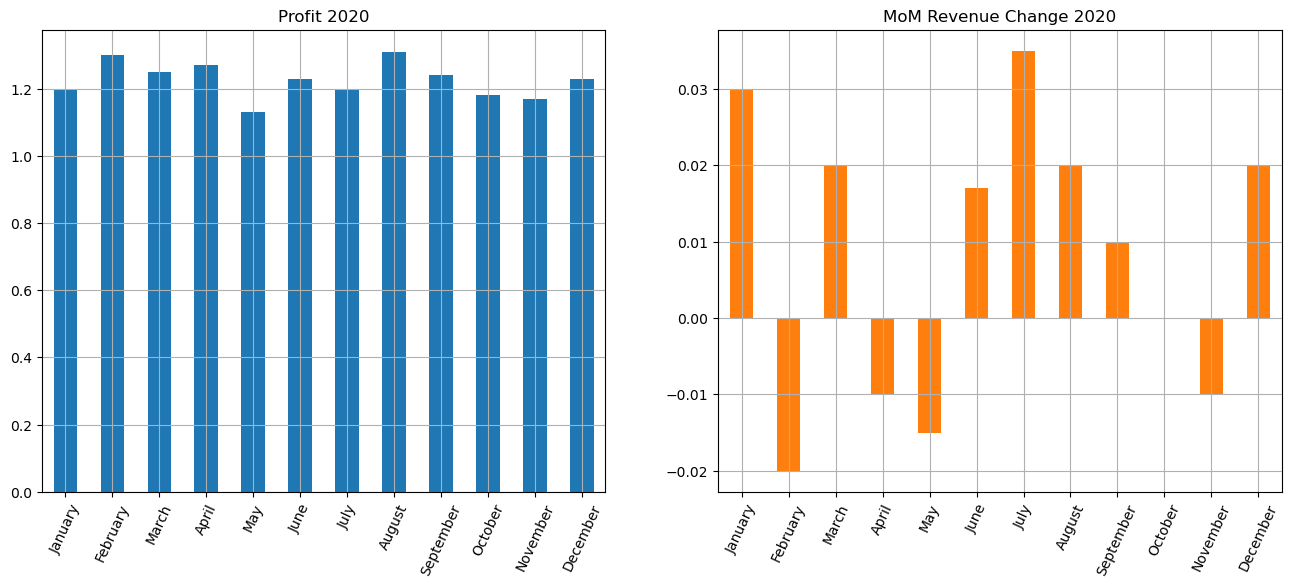

In [33]:
# построим графики для размера прибыли и изменения выручки за месяц
financials[["profit", "MoM"]].plot(
    subplots=True,  # обозначим, что хотим несколько подграфиков
    layout=(1, 2),  # зададим сетку
    kind="bar",  # укажем тип диаграммы
    rot=65,  # повернем деления шкалы оси x
    grid=True,  # добавим сетку
    figsize=(16, 6),  # укажем размер figure
    legend=False,  # уберем легенду
    title=["Profit 2020", "MoM Revenue Change 2020"],
);  # добавим заголовки